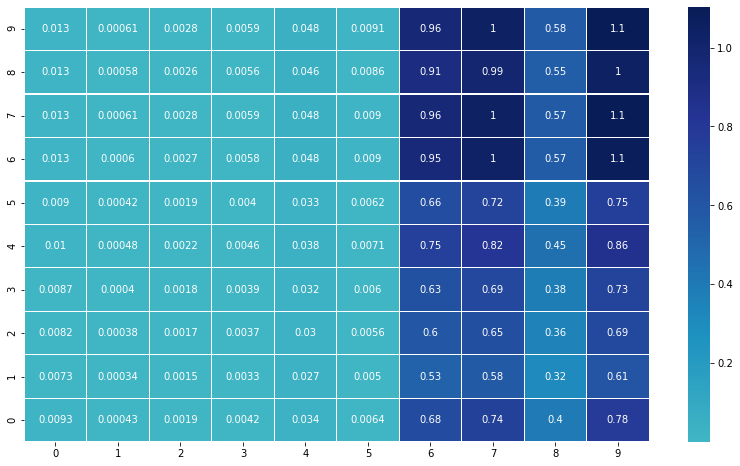

In [5]:
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
import seaborn as sns

def incoming_dataset():
    x=np.linspace(-1,1,10)
    y=0.5*x-0.3
    t=y+np.random.normal(0,0.2,10)
    return t
sample_pts=incoming_dataset()


likelihood_grid=norm(0,0.2).pdf(sample_pts)
prior_grid=norm(0,0.71).pdf(sample_pts)
likelihood_grid,prior_grid=np.meshgrid(likelihood_grid,prior_grid)

def f(A,B):
    return np.multiply(A,B)

z=f(likelihood_grid,prior_grid)
plt.figure(figsize=(14,8))
hm=sns.heatmap(z,xticklabels=True, yticklabels=True,center=0,annot=True,linewidth=0.3,cmap="YlGnBu")
hm.invert_yaxis()
    